<a href="https://colab.research.google.com/github/itss-omkar/Coding-Ninjas/blob/main/Coding_ninjas_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Random Forest Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

if uploaded:
  for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
else:
  print("No file was uploaded.")

Saving Employee_Performance_Retention.csv to Employee_Performance_Retention (3).csv
User uploaded file "Employee_Performance_Retention (3).csv" with length 352290 bytes


In [ ]:
# Load dataset
df = pd.read_csv("Employee_Performance_Retention.csv")
display(df.head())

,Employee_ID,Age,Department,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating,Job_Satisfaction_Level,Promotion_in_Last_2_Years,Attrition
0,E1000,59,Sales,27,135,30,3,Medium,Yes,No
1,E1001,49,Tech,13,132,36,5,Medium,Yes,Yes
2,E1002,35,Operations,16,197,11,5,Low,No,No
3,E1003,28,HR,23,204,36,3,High,No,No
4,E1004,41,Operations,33,192,36,2,Medium,No,No


In [ ]:
# Preprocessing
label_cols = ["Department", "Job_Satisfaction_Level", "Promotion_in_Last_2_Years", "Attrition"]
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# Drop unnecessary column
df = df.drop("Employee_ID", axis=1)

In [ ]:
# Train-Test split
X = df.drop(["Attrition"], axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# Evaluation
print("Random Forest Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1449
           1       0.00      0.00      0.00       351

    accuracy                           0.80      1800
   macro avg       0.40      0.50      0.45      1800
weighted avg       0.65      0.80      0.72      1800

ROC-AUC: 0.49507667140517386


In [ ]:
# Feature Importance
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

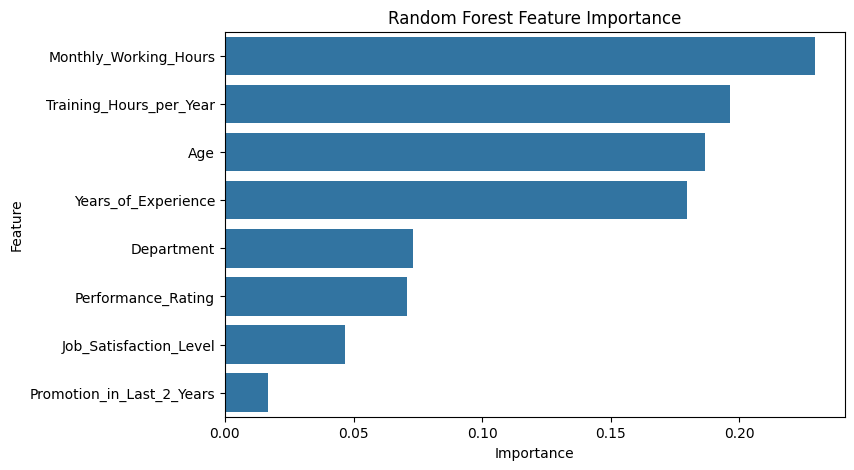

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp, x="Importance", y="Feature")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2', None]
}


In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        9000 non-null   int64
 1   Department                 9000 non-null   int64
 2   Years_of_Experience        9000 non-null   int64
 3   Monthly_Working_Hours      9000 non-null   int64
 4   Training_Hours_per_Year    9000 non-null   int64
 5   Performance_Rating         9000 non-null   int64
 6   Job_Satisfaction_Level     9000 non-null   int64
 7   Promotion_in_Last_2_Years  9000 non-null   int64
 8   Attrition                  9000 non-null   int64
dtypes: int64(9)
memory usage: 632.9 KB
None
               Age   Department  Years_of_Experience  Monthly_Working_Hours  \
count  9000.000000  9000.000000          9000.000000            9000.000000   
mean     40.113667     1.986556            16.980111             184.901000   
std      11.178092